# Grouping

Chapter 9 in Python for Data Analysis demonstrates a variety of methods to analyze data via data aggregation and grouping operations. Those are the focus of this session.  Our overall goal for this session is to do Exploratory Data Analysis, which is essentially looking at and probing our data to learn about the patterns we can discover in them.  Often this can generate a better understanding of problems in the data, as well as revealing relationships that might be worth exploring in more depth.


For this exercise, we will use 2010 US Census data, for all census tracts in Kentucky.  A good starting point for any kind of Census data is the American Fact Finder: 

https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

The Census Bureau produces several products, the most famous of which is the decennial census, which as its name implies, is a true Census.  There are a limited number of data fields for the whole population (or at least those that the Census workers are able to reach, which is pretty good).  The Census has other products that are surveys, such as the American Community Survey (ACS) which asks more detailed questions on an annual basis from a 1% sample of households.  

In this case, we are working with file DP-1: Profile of General Population and Housing Characteristics: 2010, which is also a part of something called Summary File 1 (SF-1).  It is for the 100% sample.  A data dictionary for selected fields is below.  

In [1]:
import pandas as pd

# skip the second row, which contains descriptions
sf1 = pd.read_csv('data/DEC_10_SF1_combined.csv', skiprows=[1])

# make the tract, county and state separate
sf1['tract'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[0])
sf1['county'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[1])
sf1['state'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[2])

# compute some derived fields
sf1['pct_rent'] = sf1['H4-D004'] / sf1['H4-D001'] * 100
sf1['pct_black'] = sf1['P3-D003'] / sf1['P3-D001'] * 100
sf1['pct_asian'] = sf1['P3-D005'] / sf1['P3-D001'] * 100
sf1['pct_white'] = sf1['P3-D002'] / sf1['P3-D001'] * 100
sf1['pct_hisp'] = sf1['P4-D003'] / sf1['P4-D001'] * 100
sf1['pct_vacant'] = sf1['H5-D001'] / sf1['H1-D001'] * 100
sf1[:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542


## Groupby and Aggregation Operations

Groupby is a powerful method in pandas that follows the split-apply-combine approach to data.  As shown in Figure 9-1 in the context of a sum operation, the data is first split into groups that share the same key values.  Then an operation, in this case a sum, is applied to each group.  Then the results are combined.

The built-in aggregation methods available for groupby operations include:
* count
* sum
* mean
* median
* std, var
* min, max
* first, last

You can also apply your own functions as aggregation methods.

![Groupby Operations](groupby.png "Groupby")

Let's apply this approach to computing total population in each county in our dataset.  We can do this in two steps to help explain what is happening.  First we create a groupby object, using county codes to group all the census blocks in sf1 into groups that share the same county code.

In [2]:
grouped = sf1['P1-D001'].groupby(sf1['county'])
grouped

Now that we have this grouping object that represents the **split** part of the workflow in the figure above, we can **apply** operations and **combine** the results using methods like sum:

In [3]:
grouped.sum()

county
 Adair County            18656
 Allen County            19956
 Anderson County         21421
 Ballard County           8249
 Barren County           42173
 Bath County             11591
 Bell County             28691
 Boone County           118811
 Bourbon County          19985
 Boyd County             49542
 Boyle County            28432
 Bracken County           8488
 Breathitt County        13878
 Breckinridge County     20059
 Bullitt County          74319
 Butler County           12690
 Caldwell County         12984
 Calloway County         37191
 Campbell County         90336
 Carlisle County          5104
 Carroll County          10811
 Carter County           27720
 Casey County            15955
 Christian County        73955
 Clark County            35613
 Clay County             21730
 Clinton County          10272
 Crittenden County        9315
 Cumberland County        6856
 Daviess County          96656
                         ...  
 Nicholas County          7135
 

We might want to capture the result in a DataFrame if we want to use it in other processing, like merging the results to the original DataFrame.

In [4]:
county_pop = sf1['P1-D001'].groupby(sf1['county']).sum().to_frame(name='county_population')
county_pop

,county_population
county,
Adair County,18656
Allen County,19956
Anderson County,21421
Ballard County,8249
Barren County,42173
Bath County,11591
Bell County,28691
Boone County,118811
Bourbon County,19985


In [5]:
county_pop[:5]

,county_population
county,
Adair County,18656
Allen County,19956
Anderson County,21421
Ballard County,8249
Barren County,42173


Here we merge the county total population with sf1 and create a new DataFrame.

In [6]:
sf2 = pd.merge(sf1,county_pop, left_on='county', right_index=True)
sf2[:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_population
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872,18656
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290,18656
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370,18656
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743,18656
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542,18656


## Transforming Data with Groupby

In some cases you may want to apply a function to your data, by group.  An example would be to normalize a column by a mean of each group.  Say we wanted to subtract the mean population density of each county from the population density of each census block. We could write a function to subtract the mean from each value, and then use the transform operation to apply this to each group:

In [7]:
def demean(arr):
    return arr - arr.mean()

Now we can apply this tranformation to columns in our dataframe.  As examples, let's 'demean' the pct_black and pct_rent columns, subtracting the county-wide mean of these values from the tract-specific values, so that the result is transformed to have a mean of zero within each county.

To check the results, we print the means per county, then the original values for the first 5 rows, then the transformed results.  The transformed results we should be able to calculate by subtracting the appropriate county mean from the tract value.

In [8]:
normalized = sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).transform(demean)
print(sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).mean())
print(sf1[['county','pct_black', 'pct_rent']][:5])
print(normalized[:5])

                      pct_black   pct_rent
county                                    
 Adair County          2.104384  22.886621
 Allen County          0.716792  22.312658
 Anderson County       1.419188  20.908477
 Ballard County        2.690326  21.350937
 Barren County         3.385357  29.982273
 Bath County           1.719977  23.865098
 Bell County           2.017470  32.080953
 Boone County          2.362180  24.779530
 Bourbon County        4.863221  33.604963
 Boyd County           2.690429  33.766804
 Boyle County          7.501400  33.987453
 Bracken County        0.319829  24.755274
 Breathitt County      0.291431  20.408091
 Breckinridge County   1.492590  18.524204
 Bullitt County        0.582663  18.852640
 Butler County         0.293354  20.702463
 Caldwell County       4.372987  22.422207
 Calloway County       4.146136  37.944503
 Campbell County       3.106286  34.861471
 Carlisle County       0.752688  17.877812
 Carroll County        1.184510  31.659932
 Carter Cou

We can merge these transformed results on to the original DataFrame, and check the means of the original variables and the tranformed ones.  The transformed ones should be arbitrarily close to zero.

In [9]:
sf2 = pd.merge(sf1,normalized, left_index=True, right_index=True)

sf2.groupby('county')[['pct_black_x', 'pct_black_y', 'pct_rent_x', 'pct_rent_y']].mean()

,pct_black_x,pct_black_y,pct_rent_x,pct_rent_y
county,,,,
Adair County,2.104384,-2.854859e-16,22.886621,-2.030122e-15
Allen County,0.716792,-5.551115e-17,22.312658,-3.256654e-15
Anderson County,1.419188,8.881784e-17,20.908477,7.105427e-16
Ballard County,2.690326,1.480297e-16,21.350937,0.000000e+00
Barren County,3.385357,0.000000e+00,29.982273,4.618528e-15
Bath County,1.719977,0.000000e+00,23.865098,-1.184238e-15
Bell County,2.017470,4.687608e-16,32.080953,-3.947460e-15
Boone County,2.362180,3.595008e-16,24.779530,-1.184238e-15
Bourbon County,4.863221,1.480297e-16,33.604963,0.000000e+00


Apply is a method we have learned previously, which allows us to apply a function to each row in a DataFrame.  We can also combine apply with groupby to apply functions based on group membership.  For example, the function 'top' sorts an array and selects the top n rows from it.  We provide some defaults for the arguments of how many rows, and the column to use for the selection:

In [10]:
def top(df, n=5, column='pct_rent'):
    return df.sort_values(by=column, ascending=False).head(n)

Using this on the full dataset and setting the number of rows and the column to get the top values for, in this case using pct_rent to override the default argument, we get the top 10 tracts in the region in terms of percentage rental.

In [11]:
top(sf1, n=10, column='pct_rent')

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
255,1400000US21061980100,21061980100,"Census Tract 9801, Edmonson County, Kentucky",8,8,8,0,0,0,0,...,0,Census Tract 9801,Edmonson County,Kentucky,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000
508,1400000US21111003000,21111003000,"Census Tract 30, Jefferson County, Kentucky",3565,3565,258,3187,15,1,16,...,7,Census Tract 30,Jefferson County,Kentucky,99.768697,89.396914,0.028050,7.237027,1.290323,7.883523
200,1400000US21047201501,21047201501,"Census Tract 2015.01, Christian County, Kentucky",5315,5315,3580,982,64,47,81,...,8,Census Tract 2015.01,Christian County,Kentucky,99.698568,18.476011,0.884290,67.356538,14.995296,7.072829
415,1400000US21093000202,21093000202,"Census Tract 2.02, Hardin County, Kentucky",4514,4514,3053,863,45,78,20,...,21,Census Tract 2.02,Hardin County,Kentucky,99.679230,19.118299,1.727957,67.634027,14.842712,5.957768
872,1400000US21163970200,21163970200,"Census Tract 9702, Meade County, Kentucky",2683,2683,1916,414,41,30,15,...,161,Census Tract 9702,Meade County,Kentucky,99.270960,15.430488,1.118151,71.412598,15.803205,32.980456
201,1400000US21047201502,21047201502,"Census Tract 2015.02, Christian County, Kentucky",4527,4527,3055,740,45,61,84,...,6,Census Tract 2015.02,Christian County,Kentucky,98.896435,16.346366,1.347471,67.483985,18.003093,6.507937
414,1400000US21093000201,21093000201,"Census Tract 2.01, Hardin County, Kentucky",1409,1409,1150,153,9,19,6,...,60,Census Tract 2.01,Hardin County,Kentucky,98.620690,10.858765,1.348474,81.618169,10.432931,28.571429
833,1400000US21151010500,21151010500,"Census Tract 105, Madison County, Kentucky",4182,4182,3699,330,11,56,6,...,7,Census Tract 105,Madison County,Kentucky,96.078431,7.890961,1.339072,88.450502,1.673840,8.602151
270,1400000US21067000801,21067000801,"Census Tract 8.01, Fayette County, Kentucky",4094,4094,3255,385,6,356,2,...,13,Census Tract 8.01,Fayette County,Kentucky,95.617530,9.404006,8.695652,79.506595,2.002931,36.775819
142,1400000US21037050100,21037050100,"Census Tract 501, Campbell County, Kentucky",1733,1733,1197,368,1,43,0,...,11,Census Tract 501,Campbell County,Kentucky,94.527363,21.234853,2.481246,69.070975,3.693018,7.903780


Below we apply this with groupby and use the defaults for n and column, and it applies the function within each county and concatenates the results, producing the top 5 blocks on pop_sqmi for each county in the region.

In [12]:
sf1.groupby('county').apply(top)

GEO.id      GEO.id2  \
county                                                       
 Adair County      3     1400000US21001970401  21001970401   
                   4     1400000US21001970402  21001970402   
                   2     1400000US21001970300  21001970300   
                   1     1400000US21001970200  21001970200   
                   5     1400000US21001970500  21001970500   
 Allen County      9     1400000US21003920300  21003920300   
                   10    1400000US21003920400  21003920400   
                   12    1400000US21003920600  21003920600   
                   11    1400000US21003920500  21003920500   
                   8     1400000US21003920200  21003920200   
 Anderson County   14    1400000US21005950201  21005950201   
                   13    1400000US21005950100  21005950100   
                   15    1400000US21005950202  21005950202   
                   17    1400000US21005950400  21005950400   
                   16    1400000US21005950300  21005950300   
 Ballard County    19    1400000US21007950200  21007950200   
                   18    1400000US21007950100  21007950100   
                   20    1400000US21007950300  21007950300   
 Barren County     24    1400000US21009950400  21009950400   
                   26    1400000US21009950600  21009950600   
                   22    1400000US21009950200  21009950200   
                   25    1400000US21009950500  21009950500   
                   23    1400000US21009950300  21009950300   
 Bath County       32    1400000US21011970200  21011970200   
                   31    1400000US21011970100  21011970100   
                   33    1400000US21011970300  21011970300   
 Bell County       39    1400000US21013960600  21013960600   
                   40    1400000US21013960700  21013960700   
                   38    1400000US21013960500  21013960500   
                   35    1400000US21013960200  21013960200   
...                                       ...          ...   
 Union County      1057  1400000US21225950100  21225950100   
 Warren County     1061  1400000US21227010100  21227010100   
                   1064  1400000US21227010400  21227010400   
                   1062  1400000US21227010200  21227010200   
                   1073  1400000US21227011001  21227011001   
                   1063  1400000US21227010300  21227010300   
 Washington County 1086  1400000US21229930200  21229930200   
                   1087  1400000US21229930300  21229930300   
                   1085  1400000US21229930100  21229930100   
 Wayne County      1090  1400000US21231920300  21231920300   
                   1089  1400000US21231920200  21231920200   
                   1091  1400000US21231920400  21231920400   
                   1088  1400000US21231920100  21231920100   
                   1092  1400000US21231920700  21231920700   
 Webster County    1096  1400000US21233960400  21233960400   
                   1093  1400000US21233960100  21233960100   
                   1095  1400000US21233960300  21233960300   
                   1094  1400000US21233960200  21233960200   
 Whitley County    1102  1400000US21235920600  21235920600   
                   1098  1400000US21235920200  21235920200   
                   1097  1400000US21235920100  21235920100   
                   1101  1400000US21235920500  21235920500   
                   1103  1400000US21235920700  21235920700   
 Wolfe County      1106  1400000US21237930200  21237930200   
                   1105  1400000US21237930100  21237930100   
 Woodford County   1107  1400000US21239050103  21239050103   
                   1113  1400000US21239050300  21239050300   
                   1108  1400000US21239050104  21239050104   
                   1114  1400000US21239050400  21239050400   
                   1109  1400000US21239050105  21239050105   

                                                       GEO.display-label  \
county                                                  

Here we pass arguments to the function to set n and the column to select the top value from.

In [13]:
sf1.groupby('county').apply(top, n=1, column='P1-D001')

,,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
county,,,,,,,,,,,,,,,,,,,,,,
Adair County,4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542
Allen County,9,1400000US21003920300,21003920300,"Census Tract 9203, Allen County, Kentucky",4685,4685,4473,83,19,12,0,...,86,Census Tract 9203,Allen County,Kentucky,34.676186,1.771612,0.256137,95.474920,1.173959,9.254975
Anderson County,13,1400000US21005950100,21005950100,"Census Tract 9501, Anderson County, Kentucky",8164,8164,7647,292,5,38,3,...,103,Census Tract 9501,Anderson County,Kentucky,26.186684,3.576678,0.465458,93.667320,1.641352,8.081991
Ballard County,18,1400000US21007950100,21007950100,"Census Tract 9501, Ballard County, Kentucky",4259,4259,4024,145,8,11,0,...,132,Census Tract 9501,Ballard County,Kentucky,22.140011,3.404555,0.258277,94.482273,0.986147,11.664153
Barren County,26,1400000US21009950600,21009950600,"Census Tract 9506, Barren County, Kentucky",5937,5937,5331,299,11,40,10,...,95,Census Tract 9506,Barren County,Kentucky,44.142343,5.036214,0.673741,89.792825,2.779181,11.500354
Bath County,32,1400000US21011970200,21011970200,"Census Tract 9702, Bath County, Kentucky",6192,6192,5960,81,20,10,1,...,202,Census Tract 9702,Bath County,Kentucky,26.202119,1.308140,0.161499,96.253230,1.679587,15.115877
Bell County,35,1400000US21013960200,21013960200,"Census Tract 9602, Bell County, Kentucky",5150,5150,5025,69,8,7,2,...,163,Census Tract 9602,Bell County,Kentucky,34.349030,1.339806,0.135922,97.572816,0.485437,10.937500
Boone County,47,1400000US21015070307,21015070307,"Census Tract 703.07, Boone County, Kentucky",11018,11018,10057,336,25,361,1,...,64,Census Tract 703.07,Boone County,Kentucky,11.996843,3.049555,3.276457,91.277909,1.896896,4.617315
Bourbon County,66,1400000US21017030200,21017030200,"Census Tract 302, Bourbon County, Kentucky",6018,6018,5136,432,17,43,0,...,73,Census Tract 302,Bourbon County,Kentucky,44.381107,7.178465,0.714523,85.343968,6.430708,6.934445


## Exploring Correlations in the Data

Pandas provides simple ways of computing correlation coefficients among the columns in your DataFrame.  If you use corr() on a full DF, it will produce a large correlation table.  A bit hard to navigate and you mostly would not be interested in some of these results.

In [14]:
sf1.corr()

,GEO.id2,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,...,H5-D005,H5-D006,H5-D007,H5-D008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
GEO.id2,1.000000,0.049408,0.049408,0.063873,-0.024147,0.001960,-0.048639,-0.031018,-0.020234,-0.045010,...,0.077670,0.076772,0.010594,0.119563,-0.061820,-0.033330,-0.058690,0.045403,-0.022668,0.043711
P1-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,...,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,...,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D002,0.063873,0.929708,0.929708,1.000000,-0.213918,0.363714,0.209791,0.095243,0.057796,0.351332,...,0.376236,0.064984,0.014118,0.236156,-0.257852,-0.391277,0.031737,0.382284,-0.115163,-0.289514
P3-D003,-0.024147,0.150379,0.150379,-0.213918,1.000000,0.252784,0.158195,0.171271,0.325919,0.497941,...,-0.145718,-0.120118,-0.089171,-0.003757,0.464467,0.899663,0.132016,-0.899986,0.302933,0.011119
P3-D004,0.001960,0.479878,0.479878,0.363714,0.252784,1.000000,0.131467,0.463373,0.299747,0.565977,...,0.057503,0.000613,-0.035805,0.090925,0.184507,0.114453,0.060946,-0.170683,0.299351,-0.015777
P3-D005,-0.048639,0.324468,0.324468,0.209791,0.158195,0.131467,1.000000,0.176404,0.160199,0.399051,...,-0.082495,-0.075145,-0.105767,-0.302912,0.163496,0.054982,0.923845,-0.172315,0.178430,-0.222993
P3-D006,-0.031018,0.192667,0.192667,0.095243,0.171271,0.463373,0.176404,1.000000,0.281407,0.523912,...,-0.069520,-0.049845,-0.029479,-0.106864,0.255751,0.099153,0.155861,-0.174929,0.339602,-0.039314
P3-D007,-0.020234,0.240640,0.240640,0.057796,0.325919,0.299747,0.160199,0.281407,1.000000,0.504998,...,-0.108742,-0.086525,-0.017210,-0.124005,0.305578,0.192686,0.134676,-0.334419,0.843366,-0.086896
P3-D008,-0.045010,0.581058,0.581058,0.351332,0.497941,0.565977,0.399051,0.523912,0.504998,1.000000,...,-0.029011,-0.118407,-0.088460,-0.130512,0.425299,0.307009,0.306124,-0.413328,0.466302,-0.216524


It is easy to compute correlation coeffients for a subset of columns.

In [15]:
sf1[['pct_rent', 'pct_vacant']].corr()

,pct_rent,pct_vacant
pct_rent,1.000000,0.085586
pct_vacant,0.085586,1.000000


And this method can be combined with groupby to compute correlation tables by group.

In [16]:
sf1.groupby('county')[['pct_rent', 'pct_vacant']].corr()

pct_rent  pct_vacant
county                                               
 Adair County        pct_rent    1.000000   -0.613912
                     pct_vacant -0.613912    1.000000
 Allen County        pct_rent    1.000000   -0.620421
                     pct_vacant -0.620421    1.000000
 Anderson County     pct_rent    1.000000   -0.534183
                     pct_vacant -0.534183    1.000000
 Ballard County      pct_rent    1.000000   -0.996551
                     pct_vacant -0.996551    1.000000
 Barren County       pct_rent    1.000000   -0.191198
                     pct_vacant -0.191198    1.000000
 Bath County         pct_rent    1.000000   -0.630852
                     pct_vacant -0.630852    1.000000
 Bell County         pct_rent    1.000000   -0.141065
                     pct_vacant -0.141065    1.000000
 Boone County        pct_rent    1.000000    0.306673
                     pct_vacant  0.306673    1.000000
 Bourbon County      pct_rent    1.000000    0.237854
                     pct_vacant  0.237854    1.000000
 Boyd County         pct_rent    1.000000    0.831605
                     pct_vacant  0.831605    1.000000
 Boyle County        pct_rent    1.000000    0.808447
                     pct_vacant  0.808447    1.000000
 Bracken County      pct_rent    1.000000   -0.784164
                     pct_vacant -0.784164    1.000000
 Breathitt County    pct_rent    1.000000   -0.050207
                     pct_vacant -0.050207    1.000000
 Breckinridge County pct_rent    1.000000   -0.671796
                     pct_vacant -0.671796    1.000000
 Bullitt County      pct_rent    1.000000    0.256408
                     pct_vacant  0.256408    1.000000
...                                   ...         ...
 Shelby County       pct_rent    1.000000    0.650988
                     pct_vacant  0.650988    1.000000
 Simpson County      pct_rent    1.000000    0.484368
                     pct_vacant  0.484368    1.000000
 Spencer County      pct_rent    1.000000    0.944464
                     pct_vacant  0.944464    1.000000
 Taylor County       pct_rent    1.000000   -0.656906
                     pct_vacant -0.656906    1.000000
 Todd County         pct_rent    1.000000   -0.874815
                     pct_vacant -0.874815    1.000000
 Trigg County        pct_rent    1.000000   -0.062984
                     pct_vacant -0.062984    1.000000
 Trimble County      pct_rent    1.000000   -1.000000
                     pct_vacant -1.000000    1.000000
 Union County        pct_rent    1.000000   -0.711274
                     pct_vacant -0.711274    1.000000
 Warren County       pct_rent    1.000000    0.565792
                     pct_vacant  0.565792    1.000000
 Washington County   pct_rent    1.000000   -0.660188
                     pct_vacant -0.660188    1.000000
 Wayne County        pct_rent    1.000000   -0.618131
                     pct_vacant -0.618131    1.000000
 Webster County      pct_rent    1.000000    0.847149
                     pct_vacant  0.847149    1.000000
 Whitley County      pct_rent    1.000000    0.483214
                     pct_vacant  0.483214    1.000000
 Wolfe County        pct_rent    1.000000    1.000000
                     pct_vacant  1.000000    1.000000
 Woodford County     pct_rent    1.000000    0.154547
                     pct_vacant  0.154547    1.000000

[240 rows x 2 columns]

## Your turn to practice:

Count the number of census blocks per county.

Calculate total households per county.

Calculate percent renters by county. (Careful not to calculate the mean percent rental across blocks in a county)

Calculate percent vacant by county.

Calculate mean, min and max vacancy rate (at the block level) by county.

Calculate the 90th percentile of vacancy rate (at the block level) by county.

In [17]:
#census blocks per county
county_census = sf1['GEO.display-label'].groupby(sf1['county']).count().to_frame(name ='county_tract')
county_census

,county_tract
county,
Adair County,7
Allen County,6
Anderson County,5
Ballard County,3
Barren County,10
Bath County,3
Bell County,9
Boone County,22
Bourbon County,6


In [18]:
#total households per county
grouped1 = sf1['H3-D001'].groupby(sf1['county'])
grouped1

In [19]:
grouped1.sum()

county
 Adair County            8568
 Allen County            9307
 Anderson County         9127
 Ballard County          3885
 Barren County          19188
 Bath County             5405
 Bell County            13154
 Boone County           46154
 Bourbon County          8927
 Boyd County            21803
 Boyle County           12312
 Bracken County          3840
 Breathitt County        6231
 Breckinridge County    10630
 Bullitt County         29318
 Butler County           5877
 Caldwell County         6292
 Calloway County        18065
 Campbell County        39523
 Carlisle County         2441
 Carroll County          4696
 Carter County          12311
 Casey County            7487
 Christian County       29459
 Clark County           15706
 Clay County             8875
 Clinton County          5311
 Crittenden County       4569
 Cumberland County       3690
 Daviess County         41452
                        ...  
 Nicholas County         3261
 Ohio County            10219
 Ol

In [20]:
#percent renters
rent = sf1['H4-D004'].groupby(sf1['county'])
rent.sum()

county
 Adair County            1860
 Allen County            1898
 Anderson County         2067
 Ballard County           727
 Barren County           5449
 Bath County             1110
 Bell County             4061
 Boone County           11049
 Bourbon County          2904
 Boyd County             5866
 Boyle County            3545
 Bracken County           848
 Breathitt County        1255
 Breckinridge County     1621
 Bullitt County          5307
 Butler County           1261
 Caldwell County         1330
 Calloway County         5815
 Campbell County        11380
 Carlisle County          386
 Carroll County          1521
 Carter County           2335
 Casey County            1415
 Christian County       12195
 Clark County            4604
 Clay County             2079
 Clinton County          1194
 Crittenden County        820
 Cumberland County        725
 Daviess County         12229
                        ...  
 Nicholas County          701
 Ohio County             2109
 Ol

In [21]:
rent_per = rent.sum()/grouped1.sum()*100
rent_per

county
 Adair County           21.708683
 Allen County           20.393252
 Anderson County        22.647091
 Ballard County         18.712999
 Barren County          28.397957
 Bath County            20.536540
 Bell County            30.872738
 Boone County           23.939420
 Bourbon County         32.530525
 Boyd County            26.904554
 Boyle County           28.793047
 Bracken County         22.083333
 Breathitt County       20.141229
 Breckinridge County    15.249294
 Bullitt County         18.101508
 Butler County          21.456525
 Caldwell County        21.137953
 Calloway County        32.189316
 Campbell County        28.793361
 Carlisle County        15.813191
 Carroll County         32.389267
 Carter County          18.966778
 Casey County           18.899426
 Christian County       41.396517
 Clark County           29.313638
 Clay County            23.425352
 Clinton County         22.481642
 Crittenden County      17.947034
 Cumberland County      19.647696
 Davies

In [22]:
vacant = sf1['H3-D003'].groupby(sf1['county'])
vacant.sum()

county
 Adair County           1283
 Allen County           1459
 Anderson County         758
 Ballard County          488
 Barren County          2189
 Bath County             818
 Bell County            1367
 Boone County           2938
 Bourbon County          951
 Boyd County            2016
 Boyle County           1237
 Bracken County          523
 Breathitt County        737
 Breckinridge County    2803
 Bullitt County         1645
 Butler County           820
 Caldwell County         899
 Calloway County        2535
 Campbell County        3454
 Carlisle County         325
 Carroll County          635
 Carter County          1551
 Casey County           1136
 Christian County       3315
 Clark County           1439
 Clay County            1143
 Clinton County          953
 Crittenden County       788
 Cumberland County       807
 Daviess County         2833
                        ... 
 Nicholas County         452
 Ohio County            1043
 Oldham County          1257
 Owen C

In [23]:
#percent vacant
vacant_per = grouped3.sum()/grouped1.sum()*100
vacant_per

NameError: name 'grouped3' is not defined

In [24]:
vacant_per.mean()

NameError: name 'vacant_per' is not defined

In [ ]:
vacant_per.min()

In [ ]:
vacant_per.max()

In [ ]:
#90th percentile
import numpy as np
perc90 = np.percentile(vacant_per,90)
perc90

## Some review:

I've included in the data folder a shapefile with the Census geographies.  Can you use it to: 

1. Calculate the population density of each Census tract and county in Kentucky. 
2. Make a choropleth showing the population density.  

In [25]:
import geopandas as gp

In [26]:
sf1.head()

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542


In [27]:
tracts = gp.GeoDataFrame.from_file('data/gz_2010_21_140_00_500k.shp')

In [28]:
tracts['area'] = tracts.area

In [29]:
tracts.head()

,CENSUSAREA,COUNTY,GEO_ID,LSAD,NAME,STATE,TRACT,geometry,area
0,74.333,035,1400000US21035010700,Tract,107,21,010700,"POLYGON ((-88.43010642581829 36.500896307, -88...",0.019464
1,0.205,037,1400000US21037050100,Tract,501,21,050100,"POLYGON ((-84.50608223252529 39.0950807457157,...",0.000083
2,0.186,037,1400000US21037050400,Tract,504,21,050400,"POLYGON ((-84.483948 39.09684, -84.48150699999...",0.000050
3,0.433,037,1400000US21037052100,Tract,521,21,052100,"POLYGON ((-84.4935547013056 39.1027204798606, ...",0.000161
4,0.452,037,1400000US21037052200,Tract,522,21,052200,"POLYGON ((-84.46285999999999 39.099847, -84.46...",0.000123


In [30]:
sf2 = pd.merge(sf1,tracts,left_on = 'GEO.id', right_on = 'GEO_ID')

In [31]:
county3 = sf1['H3-D003'].groupby(sf1['county']).sum().to_frame(name = 'county_vac')
county3['tot_units'] = sf1['H1-D001'].groupby(sf1['county']).sum()
county3['percent_vac'] = county3['county_vac']/county3['tot_units']*100
county3.head()

,county_vac,tot_units,percent_vac
county,,,
Adair County,1283,8568,14.974323
Allen County,1459,9307,15.676373
Anderson County,758,9127,8.305029
Ballard County,488,3885,12.561133
Barren County,2189,19188,11.408172


In [32]:
county3['pop'] = sf1['P1-D001'].groupby(sf1['county']).sum()
county3['AREA'] = sf2['CENSUSAREA'].groupby(sf2['county']).sum()
county3['pop_den'] = county3['pop']/county3['AREA']
print(county3.head())

sf2['pop_den'] = sf2['P1-D001']/sf2['CENSUSAREA']
sf2.head()

                  county_vac  tot_units  percent_vac    pop     AREA  \
county                                                                 
 Adair County           1283       8568    14.974323  18656  405.283   
 Allen County           1459       9307    15.676373  19956  344.337   
 Anderson County         758       9127     8.305029  21421  201.832   
 Ballard County          488       3885    12.561133   8249  246.659   
 Barren County          2189      19188    11.408172  42173  487.540   

                     pop_den  
county                        
 Adair County      46.032032  
 Allen County      57.954852  
 Anderson County  106.132823  
 Ballard County    33.442931  
 Barren County     86.501620  


,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,CENSUSAREA,COUNTY,GEO_ID,LSAD,NAME,STATE,TRACT,geometry,area,pop_den
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,67.730,001,1400000US21001970100,Tract,9701,21,970100,POLYGON ((-85.18837499999999 37.30695499999999...,0.018597,25.498302
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,40.270,001,1400000US21001970200,Tract,9702,21,970200,"POLYGON ((-85.44617199999999 37.140449, -85.43...",0.011336,42.761361
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,73.943,001,1400000US21001970300,Tract,9703,21,970300,"POLYGON ((-85.10521899999999 37.107729, -85.13...",0.019522,40.788175
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,40.684,001,1400000US21001970401,Tract,9704.01,21,970401,"POLYGON ((-85.31824899999999 37.110148, -85.31...",0.010748,100.039327
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,25.877,001,1400000US21001970402,Tract,9704.02,21,970402,"POLYGON ((-85.30613099999999 37.102643, -85.30...",0.006846,164.663601


In [33]:
sf3 = pd.merge

In [36]:
import folium
import pandas as pd
%matplotlib inline

map = folium.Map(location=[48,-102], zoom_start = 3)

In [37]:
tracts['pop_den'] = sf2['pop_den']

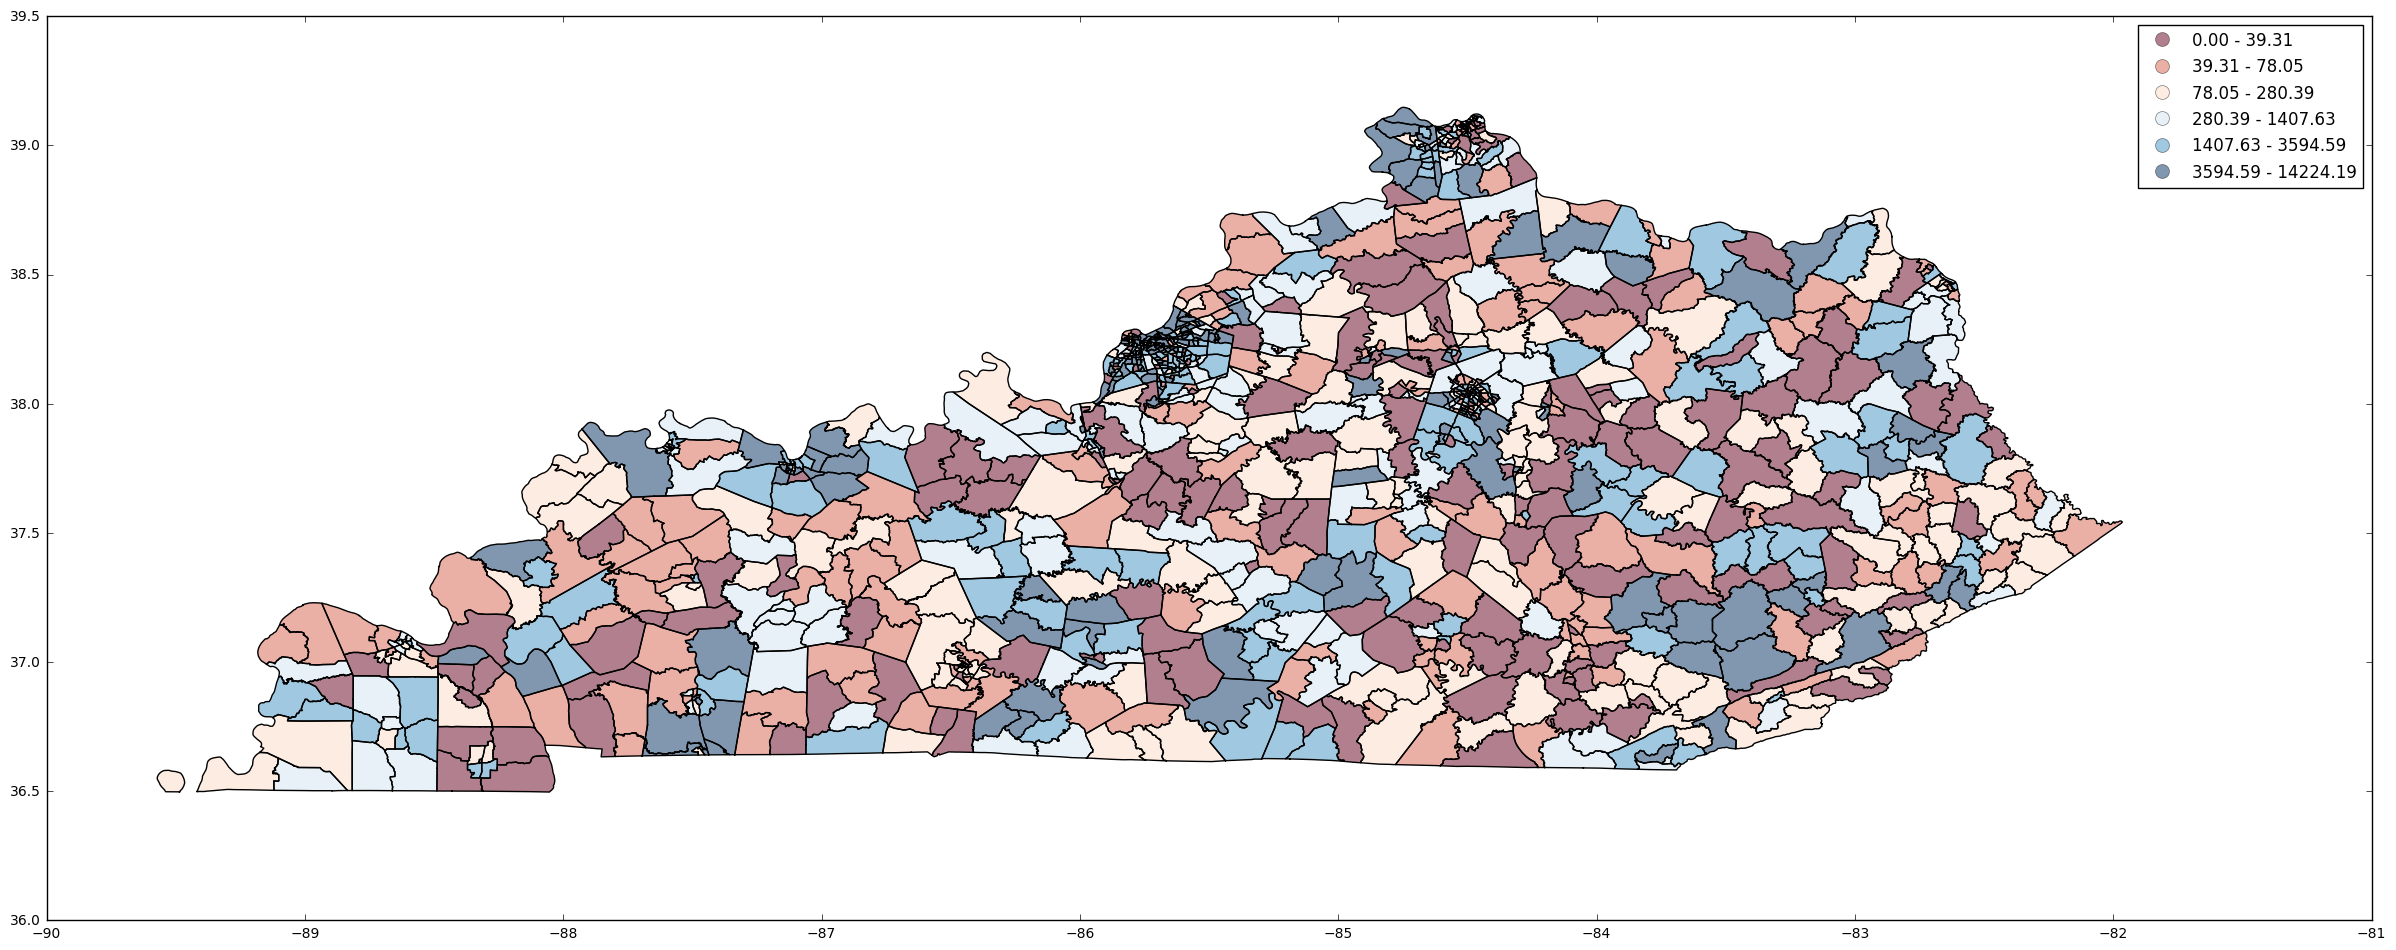

In [39]:
tracts.plot(column='pop_den', scheme = 'QUANTILES', k=6, cmap = 'RdBu', legend = True, figsize = (30,30))